/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [51

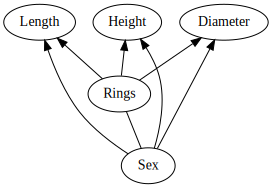

In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools
import pydot
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def examine_graph_mixed(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df, scoreId = 'cond-gauss-bic', 
           priorKnowledge = prior, dataType = 'mixed', numCategoriesToDiscretize = 5,
           structurePrior = 1.0, maxDegree = -1, faithfulnessAssumed = True, verbose = True)

    return tetrad.getTetradGraph()

def examine_graph_discrete(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df, scoreId = 'bdeu', priorKnowledge = prior, dataType = 'discrete',
               structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)
    return tetrad.getTetradGraph()

def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))

def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval

def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    #x = keras.layers.Dropout(dropouts[0])(x, training=True)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        #x = keras.layers.Dropout(drop)(x, training=True)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model

def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df, scoreId = 'cond-gauss-bic', 
           priorKnowledge = prior, dataType = 'mixed', numCategoriesToDiscretize = 4,
           structurePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)
    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC

num_models = 100     
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()

inputs = ["Sex", "Length", "Diameter"]
target =  ["Height"]

inputs = ["Sex", "Length", "Diameter", "Height"]
target =  ["Rings"]
categoricals = ['Sex'] 


df = pd.read_csv('~/Desktop/Kaggle/abalone.data', names = ["Sex", "Length", "Diameter", "Height", "Rings"], usecols = [0, 1, 2, 3, 8])
label_encoder_list = []
#one_hot = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for i,col in enumerate(['Sex']):
    label_encoder_list.append(LabelEncoder())
    df[col] = label_encoder_list[i].fit_transform(df[col].values)
tempForbid = p.ForbiddenWithin(['Diameter', 'Height', 'Length'])
temporal = [['Sex', 'Rings'], tempForbid]
prior = p.knowledge(requiredirect= [('Sex', 'Height'),('Sex', 'Diameter'), ('Sex', 'Length')],
                   addtemporal = temporal
                   )

g = examine_graph_mixed(df[inputs + target], prior = prior)
dot_str = pc.tetradGraphToDot(g)
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()

known_conx = set({})
for i in tetrad.getEdges():
    if ' --> ' in i:
        known_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))


prior = p.knowledge(requiredirect =  list(map(list, known_conx)),)

n_holdout = 1000
df['Rings'] = normalize(df['Rings'])


models = []
model_names = []


original_df = df.copy()
randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/random' + str(i))
    print(models, model_names)    
else:
    model_layers = [512,256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/abalone' + str(i))

print(models, model_names)
SVG(svg_str)

In [ ]:
bestMSE = []
bestBIC = []
bestCOMBO = []

In [9]:


for t in range(30):
    # let's split our df into two by race.  Let's see what happens if we 
    df = original_df.copy()

    #df_test = df[df['Height'] < 0.13].copy()

    '''
    Good ones
    #df_test = df.nsmallest(n_holdout, 'Height').copy()
    #df_test = df.nlargest(n_holdout, 'Height').copy()
    df_test = df.nsmallest(n_holdout, 'Length').copy()
    df_test = df.nlargest(n_holdout, 'Length').copy()
    df_test = df[df['Sex'] == 0].copy()
    '''

    '''
    bad ones
    df_test = df[df['Sex'] == 1][:n_holdout].copy()
    df_test = df[df['Sex'] == 2].copy()
    df_test = df[df['Sex'] == 1].copy()
    '''
    #df_test = df.nsmallest(n_holdout, 'Length').copy()

    holdout = 800
        #df_test = df[df['charges'] > 0.54].copy()
    continuous = ["Length",  "Diameter", "Height", "Rings"]
    
    
    small = random.randint(0,1)
    cont = random.randint(0, len(continuous) - 1)
    if small == 0:
        df_test = df.nsmallest(holdout, continuous[cont])
    else:
        df_test = df.nlargest(holdout, continuous[cont])
    
    print(t, small, continuous[cont])

    '''
        end_idx = len(df) - holdout
    cont = random.randint(0, len(continuous) - 1)
    start_idx = random.randint(0, end_idx)
    print(t, "Doing range:",start_idx, start_idx + holdout, "and ", continuous[cont])
    df_test = df.nlargest(len(df) - start_idx, continuous[cont]).nsmallest(holdout, continuous[cont])
    '''


    
    df.drop(df_test.index, inplace = True)
    df_test.reset_index(inplace = True)
    df.sample(frac= 1).reset_index(inplace = True) # this will shuffle and reset index

    x_test = df_test[inputs]
    y_test = df_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]
    len(x_causal), len(y_causal), len(x_val), len(y_val), len(x_train), len(y_train)



    x_test_NN = make_categorical(x_test, original_df, categoricals)
    x_causal_NN = make_categorical(x_causal, original_df, categoricals)
    x_val_NN = make_categorical(x_val, original_df, categoricals)
    x_train_NN = make_categorical(x_train, original_df, categoricals)

    verbosity = 0


    for idx, model_name in enumerate(model_names):
        #print(model_name)

        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.2] * len(models), np.shape(x_train_NN)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train_NN, y_train, epochs = 20, validation_data = (x_val_NN, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)




    generalization = []
    metrics = []
    proposed = []
    x_causal.reset_index(drop = True, inplace = True)

    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test_NN)
        generalization.append(mean_squared_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal_NN)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_squared_error(y_causal_pred, y_causal))
        #print(x_causal.head)
        bic_pred = get_bic(causal_df, prior)
        #print(bic_pred, tetrad.getEdges())

        found_conx = set({})
        for i in tetrad.getEdges():
            if ' --> ' in i:
                found_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
        found_conx

        if found_conx == known_conx:
            proposed.append(bic_pred)
        else:
            print("******Found an error")
            # for now just remove bad model.  Will need to add it to distance metric.
            metrics = metrics[:-1]
            generalization = generalization[:-1]
    total = normalize(metrics) + normalize(proposed)
    nbest = 10
    final = pd.DataFrame(np.stack((metrics, proposed, total, normalize(generalization)), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
    print("MSE = ", np.mean(final.nsmallest(nbest, 'metrics')['generalization']))
    print("BIC = ", np.mean(final.nsmallest(nbest, 'proposed')['generalization']))
    print("COMB = ",np.mean(final.nsmallest(nbest, 'combined')['generalization']))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'])
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'])
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'])
    

np.mean(bestMSE), np.mean(bestBIC), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

0 0 Length
MSE =  0.18345534213124992
BIC =  0.14606725892602712
COMB =  0.13684903194144
1 0 Length
MSE =  0.22823076101494671
BIC =  0.08337929915853777
COMB =  0.11489944406189696
2 0 Length
MSE =  0.27232966681387155
BIC =  0.1318140400193762
COMB =  0.11266203677726824
3 1 Diameter
MSE =  0.20648742323984398
BIC =  0.35847376992593183
COMB =  0.19132180119381567
4 1 Height
MSE =  0.3253111424948026
BIC =  0.3003739392086374
COMB =  0.2820889059232354
5 0 Diameter
MSE =  0.4024227524091965
BIC =  0.16392429696468586
COMB =  0.19229188518371032
6 0 Diameter
MSE =  0.37533774937745074
BIC =  0.08427944850281095
COMB =  0.17661443895750473
7 1 Length
MSE =  0.36058964718348846
BIC =  0.33444435645359827
COMB =  0.20549827949854804
8 0 Height
MSE =  0.24937891487348463
BIC =  0.12852030099284312
COMB =  0.13100034585053552
9 1 Diameter
MSE =  0.31527953620210747
BIC =  0.38226489607937875
COMB =  0.22773882260276465
10 1 Length
MSE =  0.3128353103426592
BIC =  0.4101328864030389
COMB =

(0.31363730321487676,
 0.24521621923038334,
 0.22410322274669048,
 0.17761657123178337,
 0.1775997168424776)

In [6]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)

np.mean(bestMSE), np.mean(bestCOMBO),np.std(bestMSE), np.std(bestCOMBO), np.mean(improvement), np.std(improvement)

(0.3153010992959631,
 0.23254413734235327,
 0.17904696450015567,
 0.18045056966883397,
 -0.8275696195360986,
 0.5182068433033671)

In [10]:
len(bestMSE)

70

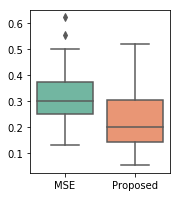

In [11]:
import seaborn as sns
val1 = []
for each in bestMSE:
    val1.append(np.mean(each))
val2 = []
for each in bestCOMBO:
    val2.append(np.mean(each))

val = []
for x, y in zip(val1, val2):
    val.append([x, y])
    
fig, ax = plt.subplots()
fig.set_size_inches(2.5,3)
df = pd.DataFrame(val, columns = ['MSE', 'Proposed'])
ax = sns.boxplot(ax = ax, data=df, palette="Set2")
fig.savefig('box-abalone.pdf')
d = dict()
d['bestMSE'] = bestMSE
d['bestCOMBO'] = bestCOMBO


import pickle

with open('abalone.pkl', 'wb') as handle:
    pickle.dump(d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 5
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))

In [ ]:
len(original_df)